hotkeys
shift + tab while hovering over a function will tell its properties
press d 2x to delete a cell

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import sklearn
from sklearn import linear_model

In [10]:
df = pd.read_csv("pastry_inventory.csv")
df

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,4/1/2019,69,18,8,10,56%
1,3,4/1/2019,70,18,12,6,33%
2,3,4/1/2019,71,18,8,10,56%
3,3,4/1/2019,72,48,9,39,81%
4,3,4/1/2019,73,18,9,9,50%
...,...,...,...,...,...,...,...
302,8,4/27/2019,69,18,1,17,94%
303,8,4/27/2019,70,18,4,14,78%
304,8,4/27/2019,71,18,2,16,89%
305,8,4/27/2019,72,48,19,29,60%


In [11]:
#Get an idea of the data
df.shape

(307, 7)

In [12]:
#Get an idea of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sales_outlet_id   307 non-null    int64 
 1   transaction_date  307 non-null    object
 2   product_id        307 non-null    int64 
 3   start_of_day      307 non-null    int64 
 4   quantity_sold     307 non-null    int64 
 5   waste             307 non-null    int64 
 6   % waste           307 non-null    object
dtypes: int64(5), object(2)
memory usage: 16.9+ KB


In [13]:
#Get descriptive statistics on the dataset
df.describe()

,sales_outlet_id,product_id,start_of_day,quantity_sold,waste
count,307.000000,307.000000,307.000000,307.000000,307.000000
mean,5.394137,70.983713,24.058632,9.296417,14.657980
std,2.049477,1.417582,12.063414,5.440115,11.202108
min,3.000000,69.000000,18.000000,0.000000,0.000000
25%,3.000000,70.000000,18.000000,6.000000,8.000000
50%,5.000000,71.000000,18.000000,8.000000,11.000000
75%,8.000000,72.000000,18.000000,11.000000,15.000000
max,8.000000,73.000000,48.000000,32.000000,47.000000


In [51]:
#check data for missing values
#a 0 denotes no missing values
df.isnull().sum()

sales_outlet_id        0
transaction_date       0
product_id             0
start_of_day           0
quantity_sold          0
waste                  0
% waste                0
transaction_weekday    0
transaction_day        0
dtype: int64

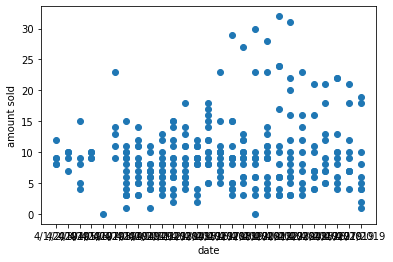

In [15]:
#plot data just to see
%matplotlib inline
plt.xlabel('date')
plt.ylabel('amount sold')
plt.scatter(df.transaction_date,df.quantity_sold)

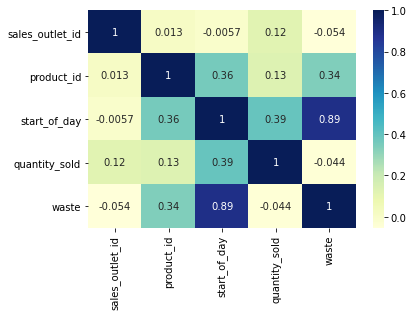

In [16]:
#generates a heat map of how data is related
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [62]:
#creates two new columns for days of the week using transaction_date to convert days of the week into enums
df["transaction_weekday"] = pd.to_datetime(df['transaction_date'], format = '%m/%d/%Y').dt.dayofweek
df["transaction_day"] = pd.to_datetime(df['transaction_date'], format = '%m/%d/%Y').dt.day_name()

df['transaction_date'] = pd.to_datetime(df['transaction_date'])
#inspect
df.head()


,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste,transaction_weekday,transaction_day
0,3,2019-04-01,69,18,8,10,56%,0,Monday
1,3,2019-04-01,70,18,12,6,33%,0,Monday
2,3,2019-04-01,71,18,8,10,56%,0,Monday
3,3,2019-04-01,72,48,9,39,81%,0,Monday
4,3,2019-04-01,73,18,9,9,50%,0,Monday


In [57]:
#start day
df['transaction_date'].min()


Timestamp('2019-04-01 00:00:00')

In [58]:
#end day
df['transaction_date'].max()

Timestamp('2019-04-27 00:00:00')

In [65]:
#get an idea of sales trends for total items sold each day
df_trend = df.groupby('transaction_date').sum()['quantity_sold'].reset_index()
df_trend

,transaction_date,quantity_sold
0,2019-04-01,46
1,2019-04-02,46
2,2019-04-03,41
3,2019-04-04,48
4,2019-04-05,0
5,2019-04-06,70
6,2019-04-07,104
7,2019-04-08,118
8,2019-04-09,91
9,2019-04-10,110


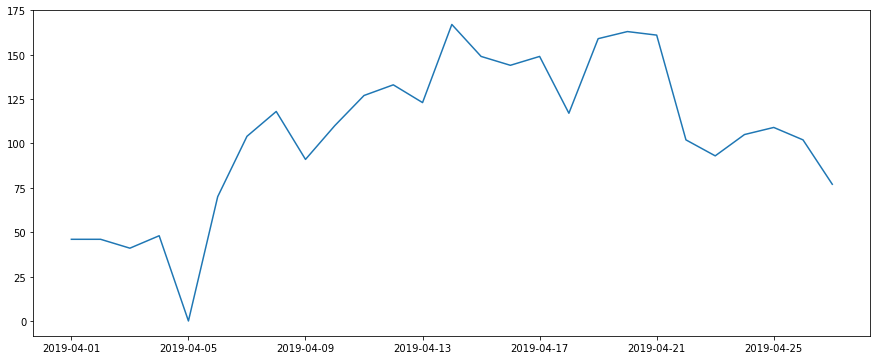

In [70]:
#graph the trend
#would like to know exactly why this doesn't show every single day in the period
plt.figure(figsize=(15,6))
plt.plot(df_trend['transaction_date'], df_trend['quantity_sold'])
#plt.xticks(rotation='vertical', size=8)

In [74]:
#discovery of top selling products
prod_sales = pd.DataFrame(df.groupby('product_id').sum()['quantity_sold'])

In [78]:
#discovery of top selling products
#72 - ginger scones
#71 - chocolate croissant
#69 - Hazelnut Biscotti
#70 - Cranberry Scone
#73 - Almond Croissant
prod_sales.sort_values('quantity_sold', ascending=False)

,quantity_sold
product_id,
72,840
71,519
69,513
70,502
73,480


In [79]:
#poor attempt to join product ids to display name
#product = pd.read_csv("product.csv")
#product
#df.join(product.set_index('product_id'), on='product_id')
#df

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste,transaction_weekday,transaction_day
0,3,2019-04-01,69,18,8,10,56%,0,Monday
1,3,2019-04-01,70,18,12,6,33%,0,Monday
2,3,2019-04-01,71,18,8,10,56%,0,Monday
3,3,2019-04-01,72,48,9,39,81%,0,Monday
4,3,2019-04-01,73,18,9,9,50%,0,Monday
...,...,...,...,...,...,...,...,...,...
302,8,2019-04-27,69,18,1,17,94%,5,Saturday
303,8,2019-04-27,70,18,4,14,78%,5,Saturday
304,8,2019-04-27,71,18,2,16,89%,5,Saturday
305,8,2019-04-27,72,48,19,29,60%,5,Saturday


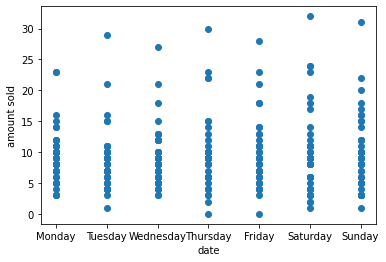

In [18]:
#testing scatterplot
%matplotlib inline
plt.xlabel('date')
plt.ylabel('amount sold')
plt.scatter(df.transaction_day,df.quantity_sold)

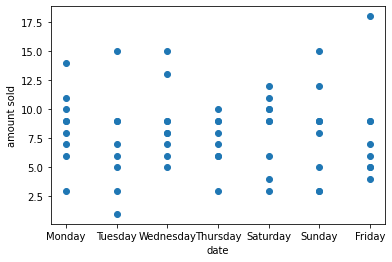

In [19]:
#isolate product 73 Almond Croissant
dfproduct73 = df[df['product_id'] == 73] 
dfproduct73

#testing scatter plot again
%matplotlib inline
plt.xlabel('date')
plt.ylabel('amount sold')
plt.scatter(dfproduct73.transaction_day,dfproduct73.quantity_sold)

In [20]:
#trying to make sense of the data
#test = df[df['product_id'] == 73]
#test = test.drop(['sales_outlet_id','% waste', 'product_id'],axis=1)

#test

In [21]:
#want one week sunday - monday with one product id, to show the amount sold

start_date = '2019-04-01'
end_date = '2019-04-08'

df[df.transaction_date.between(start_date, end_date)]
df

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste,transaction_weekday,transaction_day
0,3,2019-04-01,69,18,8,10,56%,0,Monday
1,3,2019-04-01,70,18,12,6,33%,0,Monday
2,3,2019-04-01,71,18,8,10,56%,0,Monday
3,3,2019-04-01,72,48,9,39,81%,0,Monday
4,3,2019-04-01,73,18,9,9,50%,0,Monday
...,...,...,...,...,...,...,...,...,...
302,8,2019-04-27,69,18,1,17,94%,5,Saturday
303,8,2019-04-27,70,18,4,14,78%,5,Saturday
304,8,2019-04-27,71,18,2,16,89%,5,Saturday
305,8,2019-04-27,72,48,19,29,60%,5,Saturday


dates for each week
Week 1
'2019-04-01'
'2019-04-08'

Week 2
'2019-04-08'
'2019-04-15'

Week 3 
'2019-04-15'
'2019-04-22'

Week4
'2019-04-22'
'2019-04-29'

note we miss a day 30 (tues)

In [22]:
#show only product 73 for a period of one week

start_date = pd.to_datetime('2019-04-01')
end_date = pd.to_datetime('2019-04-08')

df_pr73_w1 = df.loc[(df['transaction_date'] >= start_date) & (df['transaction_date'] < end_date)]

df_pr73_w1 = df_pr73_w1[df_pr73_w1['product_id'] == 73]
df_pr73_w1

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste,transaction_weekday,transaction_day
4,3,2019-04-01,73,18,9,9,50%,0,Monday
9,3,2019-04-02,73,18,9,9,50%,1,Tuesday
14,3,2019-04-03,73,18,15,3,17%,2,Wednesday
19,3,2019-04-04,73,18,9,9,50%,3,Thursday
25,3,2019-04-06,73,18,9,9,50%,5,Saturday
30,3,2019-04-07,73,18,3,15,83%,6,Sunday
101,5,2019-04-07,73,18,5,13,72%,6,Sunday
206,8,2019-04-07,73,18,9,9,50%,6,Sunday


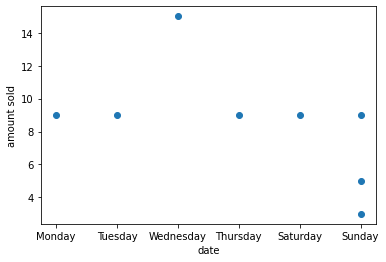

In [23]:
#plot product 73 for period of one week
#Sunday shows multiple sales, this is the result of multiple locations
%matplotlib inline
plt.xlabel('date')
plt.ylabel('amount sold')
plt.scatter(df_pr73_w1.transaction_day,df_pr73_w1.quantity_sold)

In [42]:
#trying to split data into indepneden and dependent varables
X = df[['quantity_sold','transaction_weekday']]
y = df['start_of_day']



In [33]:
# Create a copy of the DataFrame to work from
# Omit random state to have different random split each run #?

tt_data = df.copy() #make sure this copies from the correct set
train_set = tt_data.sample(frac=0.75, random_state=0)
test_set = tt_data.drop(train_set.index)

print ('Training set')
print (train_set)
print ('\nTest set')
print (test_set)
#print ('\nOriginal DataFrame')
#print (tt_data)

Training set
     sales_outlet_id transaction_date  product_id  start_of_day  \
63                 3       2019-04-14          71            18   
247                8       2019-04-16          69            18   
296                8       2019-04-25          73            18   
124                5       2019-04-12          71            18   
188                5       2019-04-25          70            18   
..               ...              ...         ...           ...   
23                 3       2019-04-06          71            18   
186                5       2019-04-24          73            18   
227                8       2019-04-12          69            18   
148                5       2019-04-17          70            18   
143                5       2019-04-16          70            18   

     quantity_sold  waste % waste  transaction_weekday transaction_day  
63               8     10     56%                    6          Sunday  
247              9      9     50%   

In [43]:
#model
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [41]:
predictions = model.predict(X)

In [36]:
#coefficient
model.coef_

array([ 0.87599201, -0.13784221])

ValueError: x and y must be the same size

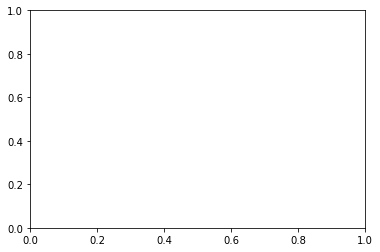

In [48]:
## This what the regression has learned
y_pred = model.predict(X)

plt.scatter(X, y,  color='blue')
plt.plot(X, y_pred, color='black', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [39]:
y.shape

(307,)

In [44]:
X.shape

(307, 2)